<a href="https://colab.research.google.com/github/taufikdimas/Machine-Learning-2025/blob/main/KUIS1_2341720062_Taufik_Dimas_Edystara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Identitas

> Nama : Taufik Dimas Edystara<br>
> NIM  : 2341720062<br>
> Kelas: TI-3G<br>
> Absen: 27<br>

# Load Data and Inspect Metadata

In [5]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [6]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

In [7]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [8]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Data Size
df.shape

(48842, 15)

In [10]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [11]:
#inspek data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#cek missing value dan jumlah nya
df.isnull().sum()[df.isnull().sum() > 0]


,0
workclass,963
occupation,966
native-country,274


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [13]:
#imputation data yang hilang
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['float64','int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [14]:
#cek hasil
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [15]:

categorical_cols = df.select_dtypes(include='object').columns

print("Kolom Kategori:")
print(categorical_cols)

for col in categorical_cols:
    print(f"\nKategori '{col}':")
    print(df[col].unique())


Kolom Kategori:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

Kategori 'workclass':
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Kategori 'education':
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Kategori 'marital-status':
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Kategori 'occupation':
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Kategori 'relationship':
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' '

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

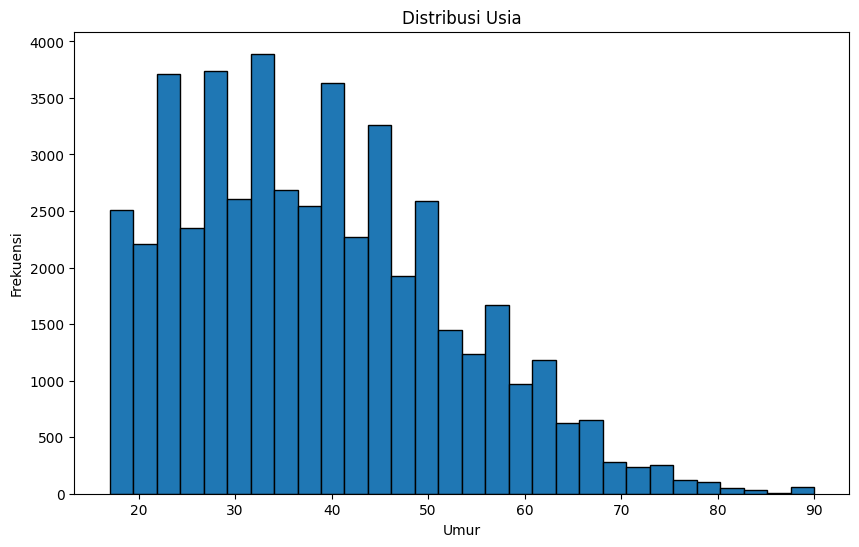

In [16]:
# Jawab 1.1 - Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribusi Usia')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

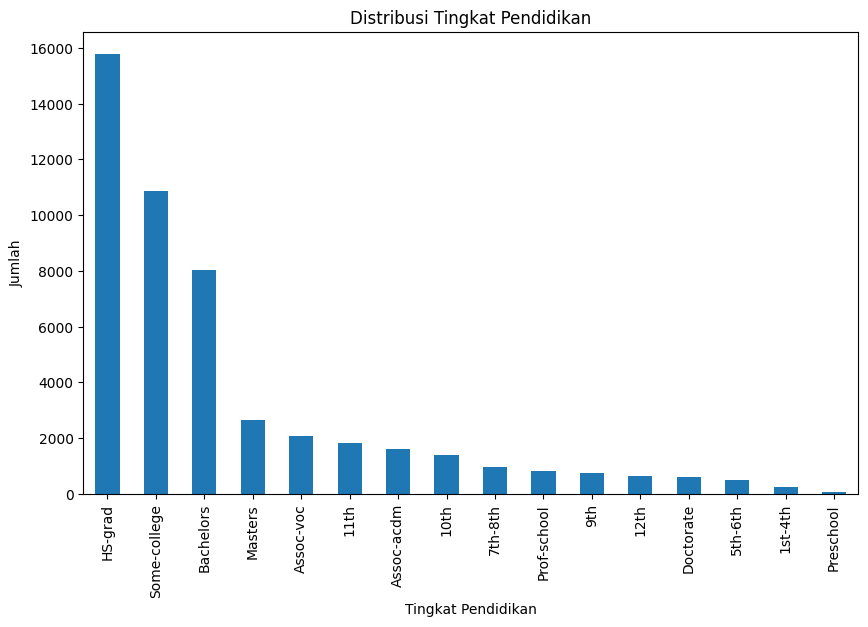

In [17]:
# Jawab 1.2 - Barchart
plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar')
plt.title('Distribusi Tingkat Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.show()

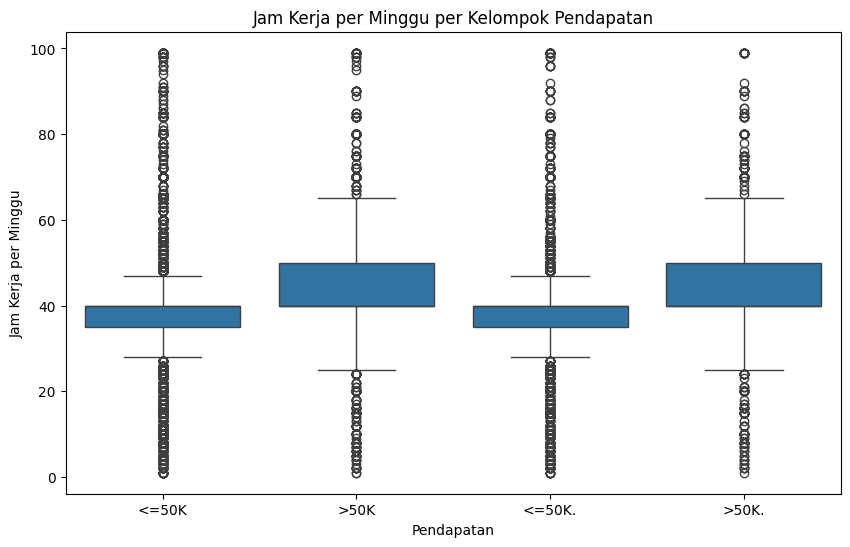

In [18]:
# Jawab 1.3 - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Jam Kerja per Minggu per Kelompok Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Jam Kerja per Minggu')
plt.show()

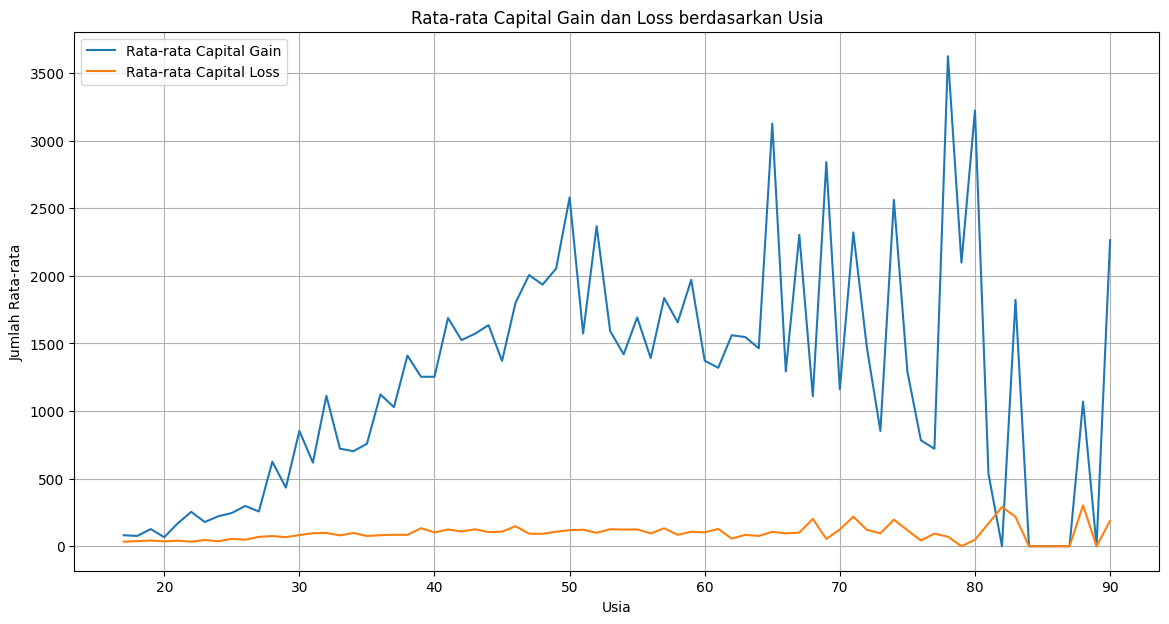

In [19]:
# Jawab 1.4 - Lineplot
capital_by_age = df.groupby('age')[['capital-gain', 'capital-loss']].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(capital_by_age['age'], capital_by_age['capital-gain'], label='Rata-rata Capital Gain')
plt.plot(capital_by_age['age'], capital_by_age['capital-loss'], label='Rata-rata Capital Loss')

plt.title('Rata-rata Capital Gain dan Loss berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Rata-rata')
plt.legend()
plt.grid(True)
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [20]:
# Jawab dengan komentar python

# Jawab
"""
1. Berdasarkan histogram, distribusi usia cenderung miring ke kanan (right-skewed),
   menunjukkan mayoritas individu berada pada usia muda hingga paruh baya,
   dan jumlah individu menurun signifikan pada usia yang lebih tua.

2. Jika terdapat data yang hilang pada variabel 'age',
   strategi yang tepat adalah imputasi menggunakan median,
   karena 'age' adalah variabel numerik kontinu dan median tahan terhadap outlier.

3. Dengan metode IQR, kategori '<=50K' memiliki lebih banyak outlier
   dibandingkan kategori '>50K'. Kategori dengan jumlah outlier terbanyak adalah '<=50K'.
"""



"\n1. Berdasarkan histogram, distribusi usia cenderung miring ke kanan (right-skewed),\n   menunjukkan mayoritas individu berada pada usia muda hingga paruh baya,\n   dan jumlah individu menurun signifikan pada usia yang lebih tua.\n\n2. Jika terdapat data yang hilang pada variabel 'age',\n   strategi yang tepat adalah imputasi menggunakan median,\n   karena 'age' adalah variabel numerik kontinu dan median tahan terhadap outlier.\n\n3. Dengan metode IQR, kategori '<=50K' memiliki lebih banyak outlier\n   dibandingkan kategori '>50K'. Kategori dengan jumlah outlier terbanyak adalah '<=50K'.\n"

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [21]:

le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,2
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,2
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,United-States,2


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

In [22]:
cols = ['age','education-num','hours-per-week','capital-gain','capital-loss','income']
print(df[cols].corr())


                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.071558      0.077229   
education-num   0.030940       1.000000        0.143689      0.125146   
hours-per-week  0.071558       0.143689        1.000000      0.082157   
capital-gain    0.077229       0.125146        0.082157      1.000000   
capital-loss    0.056944       0.080972        0.054467     -0.031441   
income          0.205173       0.291074        0.198890      0.195755   

                capital-loss    income  
age                 0.056944  0.205173  
education-num       0.080972  0.291074  
hours-per-week      0.054467  0.198890  
capital-gain       -0.031441  0.195755  
capital-loss        1.000000  0.129771  
income              0.129771  1.000000  


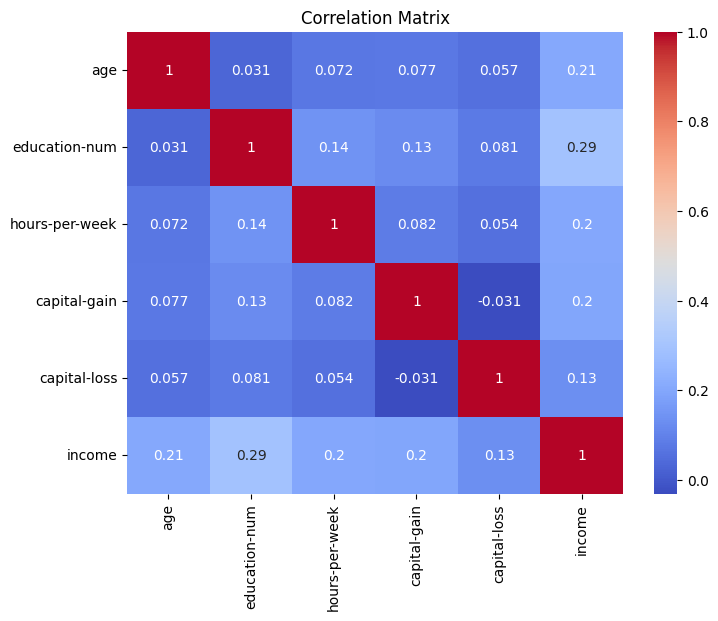

In [23]:
cols = ['age','education-num','hours-per-week','capital-gain','capital-loss','income']

plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [24]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


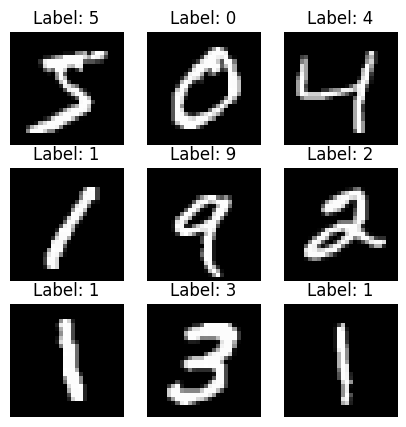

In [25]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Original test shape: (10000, 28, 28)
Upsampled test shape: (10000, 32, 32)


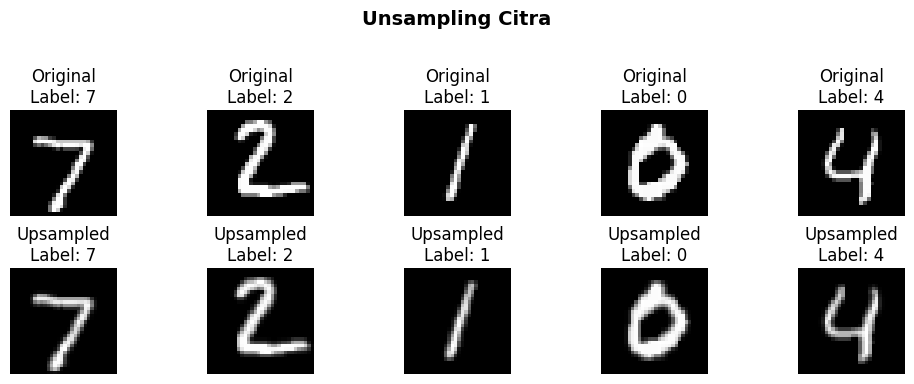

In [30]:
from skimage.transform import resize

X_upsampled = np.array([resize(img, (32,32), anti_aliasing=True) for img in X_test], dtype=np.float32)

print("Original test shape:", X_test.shape)
print("Upsampled test shape:", X_upsampled.shape)

plt.figure(figsize=(10,4))
for i in range(5):
    # Original
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.title(f"Original\nLabel: {y_test[i]}")
    plt.axis("off")

    # Upsampled
    plt.subplot(2,5,i+6)
    plt.imshow(X_upsampled[i], cmap="gray")
    plt.title(f"Upsampled\nLabel: {y_test[i]}")
    plt.axis("off")

plt.suptitle("Unsampling Citra", fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

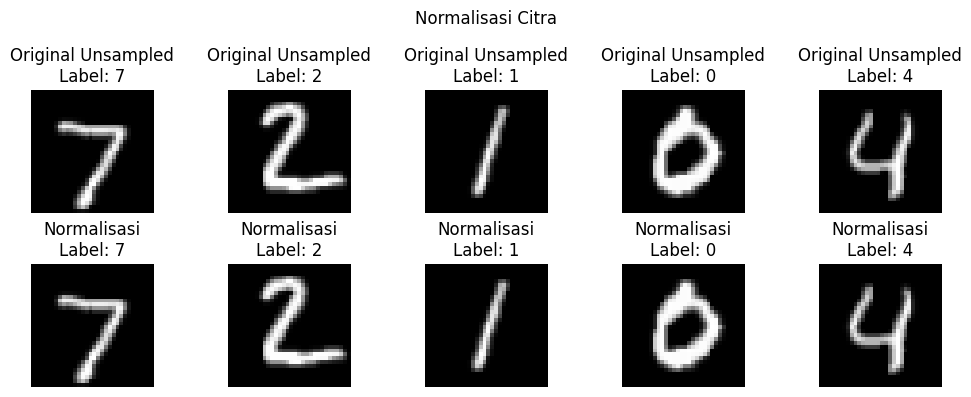

In [32]:

X_normalized = X_upsampled / 255.0

plt.figure(figsize=(10, 4))
for i in range(5):
    # Gambar Ori
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_upsampled[i], cmap="gray")
    plt.title(f"Original Unsampled\nLabel: {y_test[i]}")
    plt.axis("off")

    # normalisasi
    plt.subplot(2, 5, i + 6)
    plt.imshow(X_normalized[i], cmap="gray")
    plt.title(f"Normalisasi\nLabel: {y_test[i]}")
    plt.axis("off")

plt.suptitle("Normalisasi Citra")
plt.tight_layout()
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

Bentuk awal (2D per gambar): (10000, 32, 32)
Bentuk setelah flatten (1D per gambar): (10000, 1024)


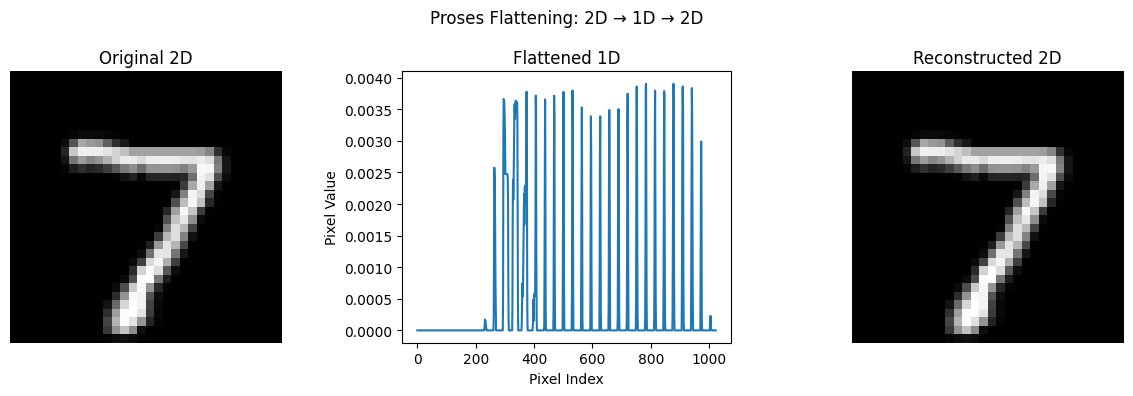

In [33]:

X_flattened = X_normalized.reshape(X_normalized.shape[0], -1)

print("Bentuk awal (2D per gambar):", X_normalized.shape)
print("Bentuk setelah flatten (1D per gambar):", X_flattened.shape)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(X_normalized[0], cmap='gray')
plt.title('Original 2D')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(X_flattened[0])
plt.title('Flattened 1D')
plt.xlabel('Pixel Index')
plt.ylabel('Pixel Value')

plt.subplot(1, 3, 3)
plt.imshow(X_flattened[0].reshape(32, 32), cmap='gray')
plt.title('Reconstructed 2D')
plt.axis('off')

plt.suptitle('Proses Flattening: 2D → 1D → 2D')
plt.tight_layout()
plt.show()
